In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [5]:
flow = cyh.MakeFlowGraph("case_2_/cascade_case_2_no_rec_raw_S2.sqlite", label='')
flow.body.pop(0)
flow

ValueError: can not merge DataFrame with instance of type <class 'NoneType'>

In [ ]:
import re

flow.body
for i in range(len(flow.body)):
    flow.body[i] = re.sub('(storage_2)', 'storage_HEU', flow.body[i])
    #flow.body[i] = re.sub('(storage)', 'str', flow.body[i])
    #flow.body[i] = re.sub('(cascade)', 'cscd', flow.body[i])

flow.view(filename='flow_case_2_no_recy')

In [6]:
file = "case_2_/cascade_case_2_no_rec_raw_S3.sqlite"
sender = [['cascade_0'], 
             ['cascade_1'], 
             ['cascade_2'], 
             ['cascade_3'], 
             ['cascade_4'], 
             ['cascade_5']]
receivers = [['storage_0'], 
          ['storage_1'], 
          ['storage_2'], 
          ['storage_3'], 
          ['storage_4'],
            ['storage_5']]
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6

c_names = ['Level 0',
           'Level 1',
           'Level 2',
           'Level 3',
           'Level 4',
           'Level 5']
labels = ['Cascade0',
          'Cascade0rec',
          'Cascade1',
          'Cascade2',
          'Cascade3',
          'Cascade4',
          'Cascade5']

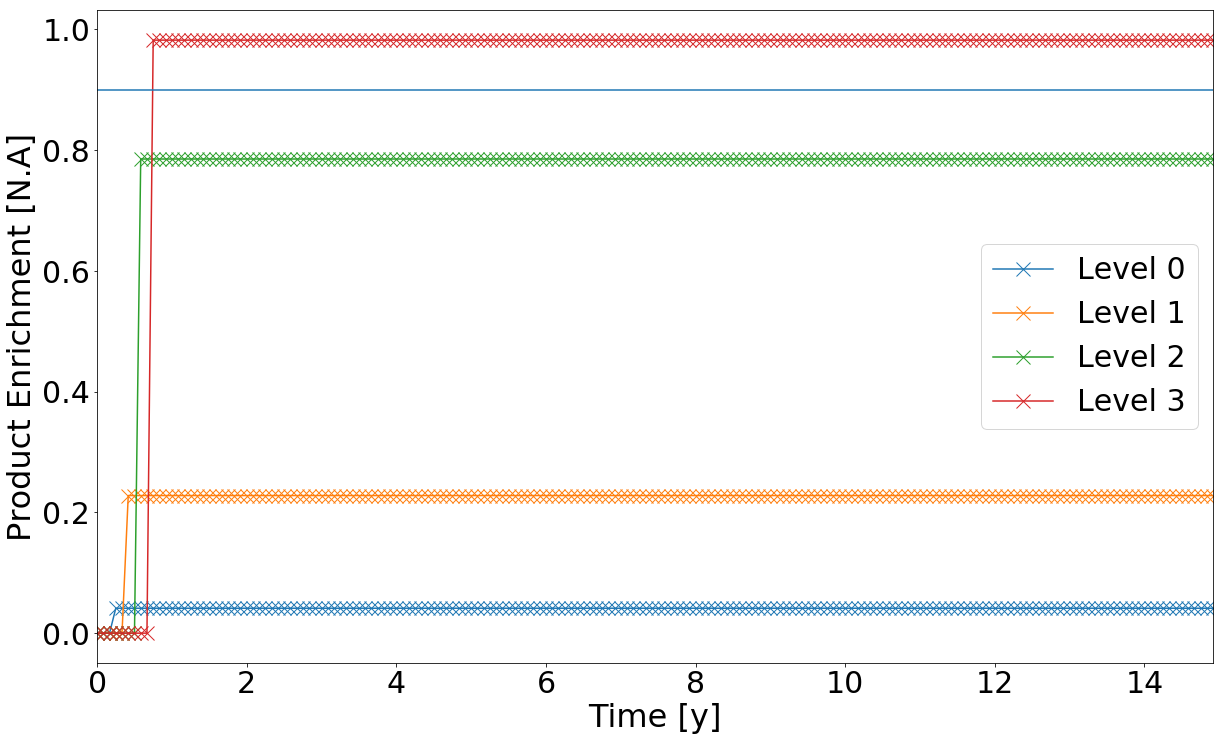

In [7]:
file = "case_2_/cascade_case_2_no_rec_raw_S3.sqlite"


feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(4):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2, "Time [y]", "Product Enrichment [N.A]" )
plt.axhline(y=0.9)
plt.savefig("assay_case_1_no_rec.png")

In [6]:
plt_feed_case_2[3]

(     Level 3   Time [y]
 0    0.00000   0.000000
 1    0.00000   0.083333
 2    0.00000   0.166667
 3    0.00000   0.250000
 4    0.00000   0.333333
 5    0.00000   0.416667
 6    0.00000   0.500000
 7    0.00000   0.583333
 8    0.00000   0.666667
 9    0.98233   0.750000
 10   0.98233   0.833333
 11   0.98233   0.916667
 12   0.98233   1.000000
 13   0.98233   1.083333
 14   0.98233   1.166667
 15   0.98233   1.250000
 16   0.98233   1.333333
 17   0.98233   1.416667
 18   0.98233   1.500000
 19   0.98233   1.583333
 20   0.98233   1.666667
 21   0.98233   1.750000
 22   0.98233   1.833333
 23   0.98233   1.916667
 24   0.98233   2.000000
 25   0.98233   2.083333
 26   0.98233   2.166667
 27   0.98233   2.250000
 28   0.98233   2.333333
 29   0.98233   2.416667
 ..       ...        ...
 150  0.98233  12.500000
 151  0.98233  12.583333
 152  0.98233  12.666667
 153  0.98233  12.750000
 154  0.98233  12.833333
 155  0.98233  12.916667
 156  0.98233  13.000000
 157  0.98233  13.083333


In [7]:
file = "cascade_case_2_no_rec_24_4_1_1.sqlite"


feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(4):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2, "Time", "Feed Enrichment" )
plt.axhline(y=0.9)

ValueError: can not merge DataFrame with instance of type <class 'NoneType'>

In [ ]:
files = ['cascade_case_2_no_rec_24_4_1_1.sqlite',
         'cascade_case_1.sqlite']
invs = ['storage_3',
        
        'storage']

c_names = ['24/4/1/1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(2):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.inventories(ev_, [invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "LEU Amount" )
plt.axhline(y=25)

x = np.arange(0, 16, 1);
#plt.plot(x, x*4.818481656138361*1*12, linewidth=4);

#plt.plot(x, x*4.306458967931736*1*12, linewidth=4);

#plt.plot(x, x*4.818481656138361*2*12, linewidth=4);
#plt.plot(x, x*4.818481656138361*3*12, linewidth=4);
#plt.plot(x, x*4.818481656138361*4*12, linewidth=4);
#plt.plot(x, x*4.818481656138361*5*12, linewidth=4);





